Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
from glob import glob
from subprocess import check_call
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import util

In [13]:
#droot = f"{config.project_tmpdir}/simulation-data/CAMS_LMDZ"
droot = "/glade/p/eol/stephens/longcoll/apo-simulation-data/CAMS_LMDZ"
os.makedirs(droot, exist_ok=True)
files = [
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFAPO_OCN.carboscope.apo99X_v2021.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_FF.GCP-GridFED.v2021.3.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_FF.OCO2-MIP.v2020.1.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_OCN.cesm_fosi_smyle.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_OCN.MPI-SOM-FFN.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFN2_OCN.cesm_fosi_smyle.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFN2_OCN.era5_shf.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_FF.GCP-GridFED.v2021.3.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_OCN.cesm_fosi_smyle.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_OCN.gk2001_R2016.repeat_monclim.txt'
]

directories = []
for f in files:
    txt_file = f'{droot}/{os.path.basename(f)}'
    
    if not os.path.exists(f):
        continue
        check_call(['wget', f], cwd=droot)

copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_surface_models.html

		# for CAMS, first read in obs
		stanc=nc_open(paste(obsobspackdir,'/co2_',tolower(sta),'_',type,'-',meth,'_',labid,'_',filt,'.nc',sep=''))
                stadat=data.frame(cbind(ncvar_get(stanc,'time_decimal'),t(ncvar_get(stanc,'time_components')),ncvar_get(stanc,'value')*1E6)) ; colnames(stadat)=c('date','year','mon','day','hour','min','sec','co2')
		system('rm cams_station_data_temp.txt')
		if(case==1){ 
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacktotfile,sep='')
		} else if(case==3){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackfosfile,sep='')
		} else if(case==4){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackocefile,sep='')
		} else if(case==5){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacklndfile,sep='')
		}
		system(paste('grep co2_',tolower(sta),'_',type,'-',meth,'_',labid,'_',filt,' ',modobspackfile,' > cams_station_data_temp.txt',sep=''))
		camsin=read.table('cams_station_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
		ids=ncvar_get(stanc,'obspack_id')
		stadat$co2=rep(NA,nrow(stadat)) # remove old
                stadat$co2[is.element(ids,camsin[,1])]=camsin[,2][match(ids[is.element(ids,camsin[,1])],camsin[,1])]


and copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_aircraft_models.html

    obsobspackdir=paste(project_tmpdir_obs,'/',gvp60dir,sep='') # read in actual data files from same GV+ version, then swap in from single CAMS file
	orcnc=nc_open(paste(obsobspackdir,'/co2_orc_aircraft-insitu_3_allvalid-merge10.nc',sep=''))
	tomnc=nc_open(paste(obsobspackdir,'/co2_tom_aircraft-insitu_1_allvalid.nc',sep=''))
	hipnc=nc_open(paste(obsobspackdir,'/co2_hip_aircraft-insitu_59_allvalid.nc',sep=''))

	if(case==1){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacktotfile,sep='')
	} else if(case==3){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackfosfile,sep='')
	} else if(case==4){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackocefile,sep='')
	} else if(case==5){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacklndfile,sep='')
	}

	orcdat=data.frame(cbind(t(ncvar_get(orcnc,'time_components')),ncvar_get(orcnc,'altitude'),ncvar_get(orcnc,'latitude'),ncvar_get(orcnc,'longitude'),ncvar_get(orcnc,'value')*1E6),ncvar_get(orcnc,'obspack_id')) ; colnames(orcdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_orcas_data_temp.txt')
	system(paste('grep co2_orc_aircraft-insitu_3_allvalid-merge10 ',modobspackfile,' > cams_orcas_data_temp.txt',sep=''))
	camsin=read.table('cams_orcas_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	orcdat$co2=rep(NA,nrow(orcdat)) # remove old
	orcdat[is.element(orcdat$obspack_id,camsin[,1]),'co2']=camsin[match(orcdat$obspack_id[is.element(orcdat$obspack_id,camsin[,1])],camsin[,1]),2]

	tomdat=data.frame(cbind(t(ncvar_get(tomnc,'time_components')),ncvar_get(tomnc,'altitude'),ncvar_get(tomnc,'latitude'),ncvar_get(tomnc,'longitude'),ncvar_get(tomnc,'value')*1E6),ncvar_get(tomnc,'obspack_id')) ; colnames(tomdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_atom_data_temp.txt')
	system(paste('grep co2_tom_aircraft-insitu_1_allvalid ',modobspackfile,' > cams_atom_data_temp.txt',sep=''))
	camsin=read.table('cams_atom_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	tomdat$co2=rep(NA,nrow(tomdat)) # remove old
	tomdat[is.element(tomdat$obspack_id,camsin[,1]),'co2']=camsin[match(tomdat$obspack_id[is.element(tomdat$obspack_id,camsin[,1])],camsin[,1]),2]

	hipdat=data.frame(cbind(t(ncvar_get(hipnc,'time_components')),ncvar_get(hipnc,'altitude'),ncvar_get(hipnc,'latitude'),ncvar_get(hipnc,'longitude'),ncvar_get(hipnc,'value')*1E6),ncvar_get(hipnc,'obspack_id')) ; colnames(hipdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_hippo_data_temp.txt')
	system(paste('grep co2_hip_aircraft-insitu_59_allvalid ',modobspackfile,' > cams_hippo_data_temp.txt',sep=''))
	camsin=read.table('cams_hippo_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	hipdat$co2=rep(NA,nrow(hipdat)) # remove old
	## not all v4.2.1 ids are in reported CAMS output, but all reported CAMS output is in v4.2.1
	hipdat[is.element(hipdat$obspack_id,camsin[,1]),'co2']=camsin[match(hipdat$obspack_id[is.element(hipdat$obspack_id,camsin[,1])],camsin[,1]),2]

(note, obsobspackdir should point to GV+ 7.0 now)
    

### Contribution details
- 10 text files in CAMS-specific format, one each corresponding to requested tracers
- within each of which are 460,635 rows and 2 columns (ObsPack ID and Value)
- it is necessary to match ObsPack ID to the original file
- Example first three lines:

LJO_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_ljo_surface-flask_4_representative\~13859752 406.65870540710057

LJO_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_ljo_surface-flask_4_representative\~13859753 395.99932744773474

ALT_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_alt_surface-flask_4_representative\~13856865 395.0473775069313

In [17]:
# need to read in obs and then add CAMS tracers in
obspack_dir = "/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc"
obspack_filenames = [ # now including aircraft
    f"{obspack_dir}/co2_alt_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_brw_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cba_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cgo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_kum_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_ljo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_mlo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_psa_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_smo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_spo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_hip_aircraft-insitu_59_allvalid.nc",
    f"{obspack_dir}/co2_orc_aircraft-insitu_3_allvalid-merge10.nc",
    f"{obspack_dir}/co2_tom_aircraft-insitu_1_allvalid.nc",
    f"{obspack_dir}/co2_gould_shipboard-insitu_1_allvalid.nc",
]

obspack_files = {}
for f in obspack_filenames:
    stn = os.path.basename(f).split('_')[1]
    obspack_files[stn] = os.path.basename(f)

In [18]:
# not used
cams_tracers = [
    'APO_OCN.carboscope.apo99X_v2021',
    'O2_OCN.cesm_fosi_smyle',
    'O2_OCN.gk2001_R2016.repeat_monclim',
    'O2_FF.GCP-GridFED.v2021.3',
    'CO2_OCN.cesm_fosi_smyle',
    'CO2_OCN.MPI-SOM-FFN',
    'CO2_FF.GCP-GridFED.v2021.3',
    'CO2_FF.OCO2-MIP.v2020.1',  
    'N2_OCN.cesm_fosi_smyle',
    'N2_OCN.era5_shf',
]

# not used
sno_vars = [
    'apo_jena',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

In [ ]:
##### currently failing on merge attempt below - need to fix then propagate df-ds switch onward

In [19]:
# droot defined above
cams_dict = { 
    'apo_jena' : 'APO_OCN.carboscope.apo99X_v2021',
    'o2_cesm' : 'O2_OCN.cesm_fosi_smyle',
    'o2_gk01r16' : 'O2_OCN.gk2001_R2016.repeat_monclim',
    'o2_gridfed' : 'O2_FF.GCP-GridFED.v2021.3',
    'co2_cesm' : 'CO2_OCN.cesm_fosi_smyle',
    'co2_somffn' : 'CO2_OCN.MPI-SOM-FFN',
    'co2_gridfed' : 'CO2_FF.GCP-GridFED.v2021.3',
    'co2_oco2mip' : 'CO2_FF.OCO2-MIP.v2020.1',  
    'n2_cesm' : 'N2_OCN.cesm_fosi_smyle',
    'n2_era' : 'N2_OCN.era5_shf'
}
#cams_dict[sno_vars[0]]

### loop on station, open obs, loop on tracer, open file, match obspack_ids and add to obs

#for station in 'cba':
station = 'cba'
obs_path = f"{obspack_dir}/co2_{station}_surface-flask_4_representative.nc"
print(obs_path)
ds = xr.open_dataset(obs_path)

# get time as coordinate
time = ds.time
time.name = 'obs'
ds['obs'] = time
ds = ds.drop('time').rename({'obs': 'time'})
    
#ds.to_netcdf(f"inverse_model_obspack_files/NIES/{obspack_files[station]}")

#df['obspack_id'] = df['obspack_id'].str.decode('utf-8')
ds['obspack_id'] = ds['obspack_id'].str.decode('utf-8')

for tracer in cams_dict:
    #print(tracer,cams_dict[tracer])

    path = f"{droot}/XSF{cams_dict[tracer]}.txt"
    print(path)

    cams_df = pd.read_csv(path, delim_whitespace=True, names = ['obspack_id', tracer], comment = '#')

    cams_df['obspack_id'] = cams_df['obspack_id'].str.split('_', n = 1, expand=True).iloc[:,1]

    ds = ds.merge(cams_df, join = 'left', compat = 'no_conflicts') # , on = 'obspack_id')
        
#ds['time'] = pd.to_datetime(tc)

/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc/co2_cba_surface-flask_4_representative.nc
/glade/p/eol/stephens/longcoll/apo-simulation-data/CAMS_LMDZ/XSFAPO_OCN.carboscope.apo99X_v2021.txt


MergeError: conflicting values for variable 'obspack_id' on objects to be combined. You can skip this check by specifying compat='override'.

In [ ]:
# kluge, need to loop
station = 'psa'
obs_path = f"{obspack_dir}/co2_{station}_surface-flask_4_representative.nc"
print(obs_path)
ds = xr.open_dataset(obs_path)
tc = ds['time_components']
tc = tc.to_dataframe(dim_order=['calendar_components','obs']).unstack(level=0)
tc.columns = ['year', 'month', 'day', 'hour', 'minute', 'second'] 
droplist = ['time_components','solartime_components','MIP_MDM','MIP_models','assimilation_concerns']
ds = ds.drop(droplist)
df2 = ds.to_dataframe()
df2['obspack_id'] = df2['obspack_id'].str.decode('utf-8')
#print(df2['obspack_id'])

for tracer in cams_dict:
    #print(tracer,cams_dict[tracer])

    path = f"{droot}/XSF{cams_dict[tracer]}.txt"
    print(path)

    cams_df = pd.read_csv(path, delim_whitespace=True, names = ['obspack_id', tracer], comment = '#')

    cams_df['obspack_id'] = cams_df['obspack_id'].str.split('_', n = 1, expand=True).iloc[:,1]

    df2 = df2.merge(cams_df, how = 'left', on = 'obspack_id')
    
df2['time'] = pd.to_datetime(tc)
df2 = df2.set_index('time')

In [ ]:
# subtract off background value

sno_vars = [
    'apo_jena',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

for v in sno_vars:
    df[v]=df[v]-400.0
    df2[v]=df2[v]-400.0

In [ ]:
# add derived APO variables

df['apo_cesm'] = util.compute_apo (
    o2=df['o2_cesm'],
    co2=df['co2_cesm'],
    n2=df['n2_cesm']
)

df['apo_diss'] = util.compute_apo (
    o2=df['o2_gk01r16'],
    co2=df['co2_somffn'],
    n2=df['n2_era']
)

df['apo_gridfed'] = util.compute_apo (
    o2=df['o2_gridfed'],
    co2=df['co2_gridfed'],
    n2=0.0
)

df['apo_oco2mip'] = util.compute_apo (
    o2=df['co2_oco2mip'] * -1.4,
    co2=df['co2_oco2mip'],
    n2=0.0
)

# kluge - need to make station name dynamic and allow any number of stations
df2['apo_cesm'] = util.compute_apo (
    o2=df2['o2_cesm'],
    co2=df2['co2_cesm'],
    n2=df2['n2_cesm']
)

df2['apo_diss'] = util.compute_apo (
    o2=df2['o2_gk01r16'],
    co2=df2['co2_somffn'],
    n2=df2['n2_era']
)

df2['apo_gridfed'] = util.compute_apo (
    o2=df2['o2_gridfed'],
    co2=df2['co2_gridfed'],
    n2=0.0
)

df2['apo_oco2mip'] = util.compute_apo (
    o2=df2['co2_oco2mip'] * -1.4,
    co2=df2['co2_oco2mip'],
    n2=0.0
)

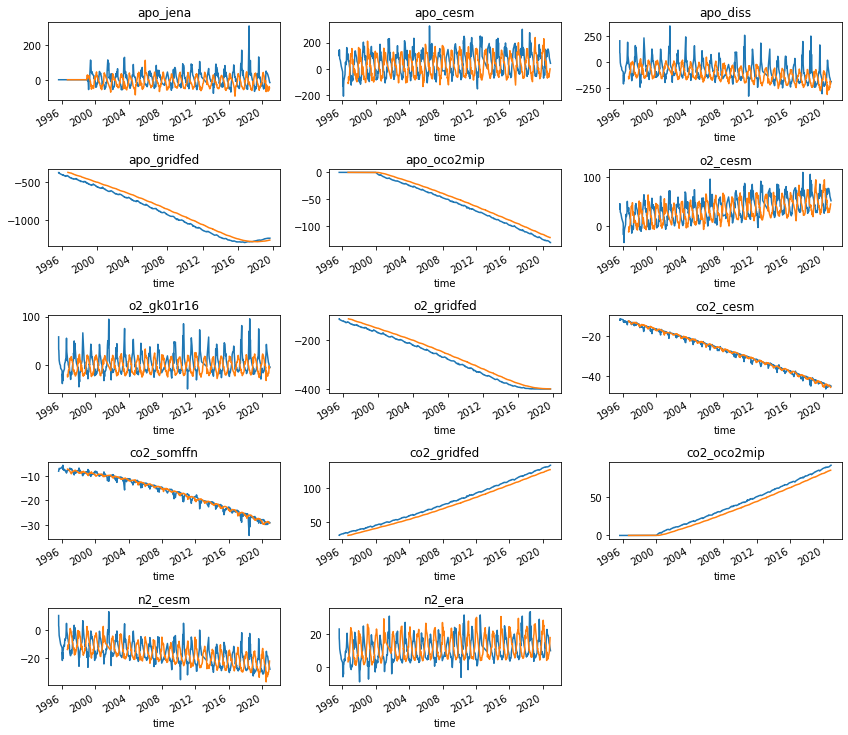

In [194]:
# make plots

sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    df[v].plot(ax=ax)
    df2[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()

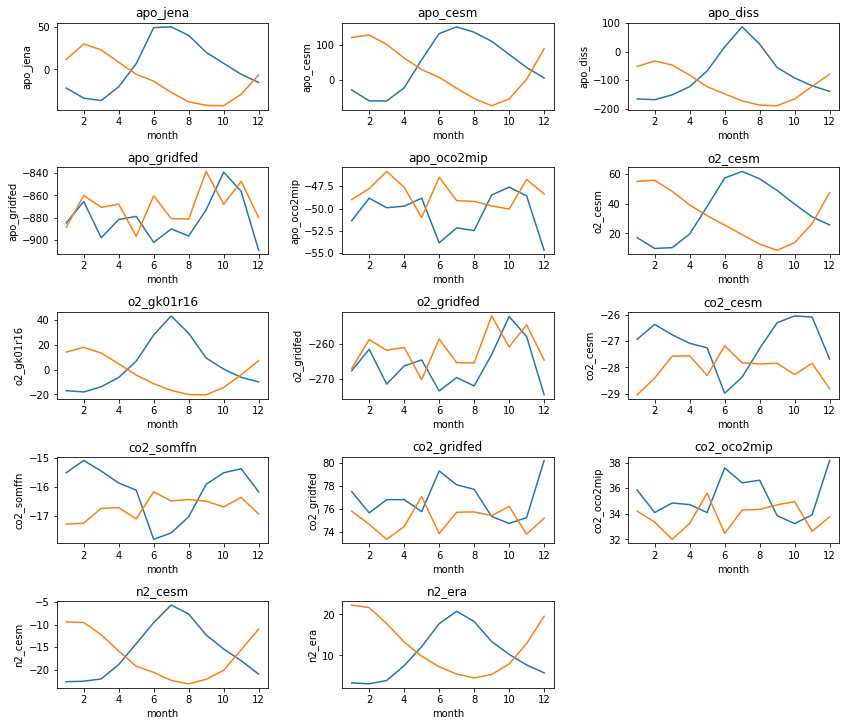

In [195]:
# seasonal climatology
ds = df.to_xarray()
ds_seas=ds.groupby('time.month').mean('time')
ds_seas['apo_cesm']

# kluge - need to make station name dynamic and allow any number of stations
ds2 = df2.to_xarray()
ds2_seas=ds2.groupby('time.month').mean('time')
ds2_seas['apo_cesm']

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds_seas[v].plot(ax=ax)
    ds2_seas[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    